<a href="https://colab.research.google.com/github/shahidmonowar/Prediction_on_decorating_buildings_naturally/blob/main/wtmoc_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [42]:
import pandas as pd

In [43]:
wtmoc = pd.read_csv('gdrive/My Drive/AI reasearch wtmoc/Contact-Information-Responses-Form-responses-1.csv')

Show Dataset

In [44]:
wtmoc.head()

,Name,Gender,Age,address,profession,willing,choice
0,Shahid Monowar,Male,20-30,Town,Student,yes,Flowering plant
1,Jahirul Islam,Male,20-30,Town,Student,No,shrubs
2,Kalpana akter,Female,20-30,Major city,Student,yes,Flowering plant
3,Nitu,Female,20-30,Town,Student,yes,Flowering plant
4,Mishu,Female,20-30,Town,Student,yes,Plant


In [45]:
wtmoc.isnull().sum()

Name            0
Gender          0
Age             0
address         0
profession      0
willing         0
choice        130
dtype: int64

show shape

In [46]:
wtmoc.shape

(1002, 7)

show all information with missing value

In [47]:
wtmoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1002 non-null   object
 1   Gender      1002 non-null   object
 2   Age         1002 non-null   object
 3   address     1002 non-null   object
 4   profession  1002 non-null   object
 5   willing     1002 non-null   object
 6   choice      872 non-null    object
dtypes: object(7)
memory usage: 54.9+ KB


In [48]:
wtmoc.isnull().sum()

Name            0
Gender          0
Age             0
address         0
profession      0
willing         0
choice        130
dtype: int64

Import library for data visualization


In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


Create a function for showing the graph

In [50]:
def bar_chart(feature):
  yes = wtmoc[wtmoc['willing']==1][feature].value_counts()
  no = wtmoc[wtmoc['willing']==0][feature].value_counts()
  df = pd.DataFrame([yes,no])
  df.index = ['Yes','No']
  df.plot(kind = 'bar',stacked=True, figsize=(10,5))

In [51]:
wtmoc.head()

,Name,Gender,Age,address,profession,willing,choice
0,Shahid Monowar,Male,20-30,Town,Student,yes,Flowering plant
1,Jahirul Islam,Male,20-30,Town,Student,No,shrubs
2,Kalpana akter,Female,20-30,Major city,Student,yes,Flowering plant
3,Nitu,Female,20-30,Town,Student,yes,Flowering plant
4,Mishu,Female,20-30,Town,Student,yes,Plant


In [52]:
wtmoc_test_data = [wtmoc]

Training and Testing and Model Evaluation

In [53]:
wtmoc['Gender'].value_counts()

Female    525
Male      477
Name: Gender, dtype: int64

In [54]:
gender_mapping = {"Male": 0, "Female": 1}
for dataset in wtmoc_test_data:
    dataset['Gender'] = dataset['Gender'].map(gender_mapping )

In [55]:
wtmoc['Gender'].value_counts()

1    525
0    477
Name: Gender, dtype: int64

In [56]:
wtmoc['Age'].value_counts()

20-30    442
30-40    267
40-50    180
50-60    112
20_30      1
Name: Age, dtype: int64

In [57]:
age_mapping = {"20-30": 0,"20_30":0,"30-40": 1,"40-50": 2,"50-60": 3}
for dataset in wtmoc_test_data:
    dataset['Age'] = dataset['Age'].map(age_mapping )

In [58]:
wtmoc['profession'].value_counts()

Job        406
Student    356
Jobless    240
Name: profession, dtype: int64

In [59]:
pro_mapping = {"Job": 0, "job": 0,"Student": 1, "student": 1,"Jobless": 2}
for dataset in wtmoc_test_data:
    dataset['profession'] = dataset['profession'].map(pro_mapping)

In [60]:
wtmoc['address'].value_counts()

City          268
Town          266
Major city    252
Urban area    212
city            2
Village         1
urban area      1
Name: address, dtype: int64

In [61]:
ad_mapping = {"City": 0, "city": 0,"urban area": 1, "Urban area": 1,"Major city": 3,"Town": 4,"Village":1}
for dataset in wtmoc_test_data:
    dataset['address'] = dataset['address'].map(ad_mapping)

In [62]:
wtmoc['willing'].value_counts()

Yes    790
No     169
yes     43
Name: willing, dtype: int64

In [63]:
will_mapping = {"Yes": 0, "yes": 0,"No": 1}
for dataset in wtmoc_test_data:
    dataset['willing'] = dataset['willing'].map(will_mapping)

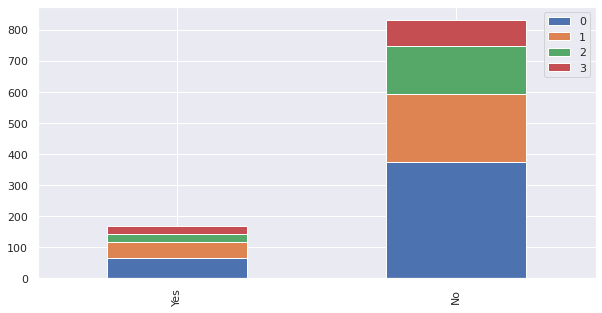

In [64]:
bar_chart("Age")

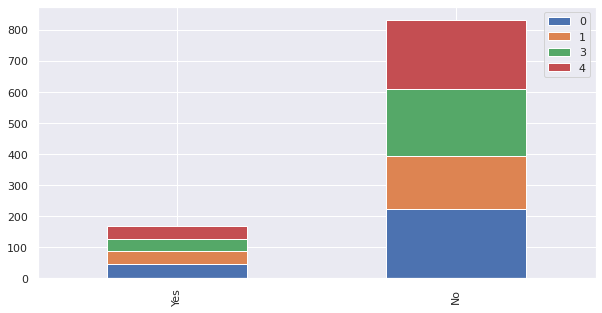

In [65]:
bar_chart("address")

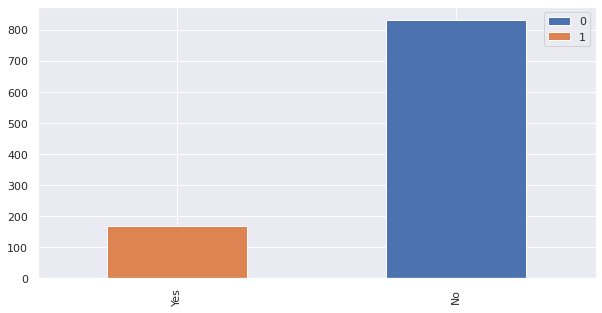

In [66]:
bar_chart("willing")

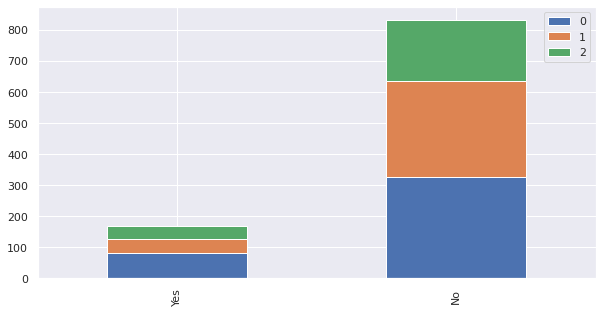

In [67]:
bar_chart("profession")

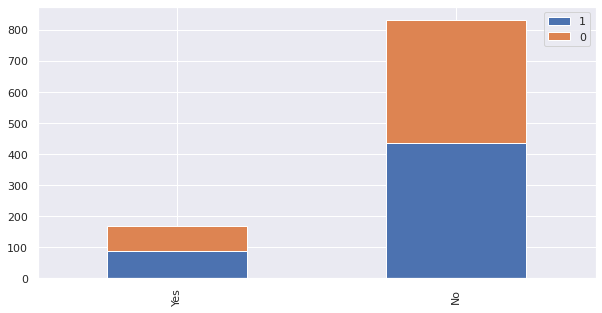

In [68]:
bar_chart("Gender")

In [69]:
wtmoc.head()

,Name,Gender,Age,address,profession,willing,choice
0,Shahid Monowar,0,0,4,1,0,Flowering plant
1,Jahirul Islam,0,0,4,1,1,shrubs
2,Kalpana akter,1,0,3,1,0,Flowering plant
3,Nitu,1,0,4,1,0,Flowering plant
4,Mishu,1,0,4,1,0,Plant


#**Dropping Unncecssary attribute**

In [70]:
features_drop = ['Name','choice']
wtmoc = wtmoc.drop(features_drop, axis=1)

In [71]:
wtmoc.head()

,Gender,Age,address,profession,willing
0,0,0,4,1,0
1,0,0,4,1,1
2,1,0,3,1,0
3,1,0,4,1,0
4,1,0,4,1,0


In [72]:
# (X_TRAIN->train_data, Y_TRAIN->target), X_TEST, Y_TEST
wtmoc_data = wtmoc.drop('willing', axis=1)     
target = wtmoc['willing']

wtmoc_data.shape, target.shape

((1002, 4), (1002,))

In [73]:
#Start Confusion Matrix Evaluation

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wtmoc_data, target, test_size=.20, random_state=42)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)
print(y_test)

y_test.value_counts()

X_train:  (801, 4)
X_test:  (201, 4)
y_train:  (801,)
y_test:  (201,)
521    0
739    0
823    0
662    0
411    0
      ..
332    0
208    0
615    0
78     0
29     0
Name: willing, Length: 201, dtype: int64


0    160
1     41
Name: willing, dtype: int64

In [74]:
wtmoc.isnull().sum()

Gender        0
Age           0
address       0
profession    0
willing       0
dtype: int64

In [75]:
# Importing Classifier Modules
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[158   2]
 [ 40   1]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.88       160
           1       0.33      0.02      0.05        41

    accuracy                           0.79       201
   macro avg       0.57      0.51      0.46       201
weighted avg       0.70      0.79      0.71       201



In [77]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7910447761194029


In [78]:
from sklearn.ensemble import RandomForestClassifier

dt = RandomForestClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[158   2]
 [ 41   0]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       160
           1       0.00      0.00      0.00        41

    accuracy                           0.79       201
   macro avg       0.40      0.49      0.44       201
weighted avg       0.63      0.79      0.70       201



In [80]:
print(accuracy_score(y_test, y_pred))

0.7860696517412935
